# Neural Networks

The following is a brief overview of neural networks, an introduction to Python modules designed to assist with building neural networks, and an example problem.  The following information was garnered from the "Introduction to Deep Learning in Python" course on DataCamp.

## Overview of Neural Networks

Neural networks enable analysts to perform powerful predictions, expanding upon many of the limitations of a linear regression approach.  Neural networks take a set of data from <b>input nodes</b>, feed them through a series of <b>hidden layers</b>, and arrive at an <b>output node</b> yeilding a predicted result.  As the data flows from the input nodes to the output node, it is magnified by the weights on each arc connecting the nodes and is impacted by <b>activation functions</b> acting on data at specific nodes.  To determine the weights on these nodes, non-linear optimization routines (e.g., gradient descent) are implemented on known input/output training datasets to minimize the error as represented by the <b>loss function</b>.

To illustrate these concepts, let's visualize a toy example.  In this scenario, two values are fed into the model as inputs to predict a single output value.

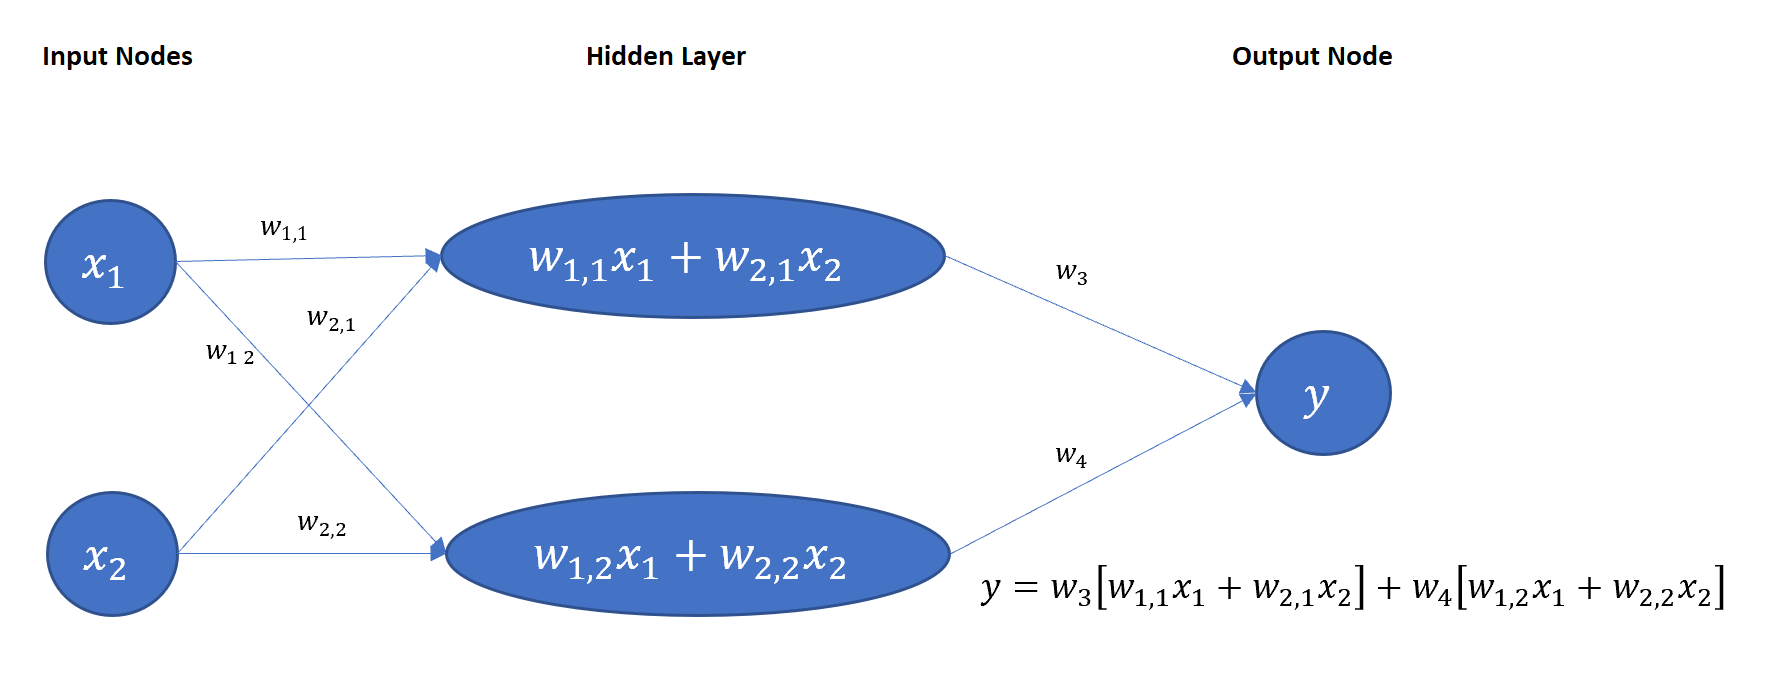

In this diagram, we see that the values of the hidden layer is computed by adding the products of each input node and it's respective weighted arc.  If we wished to account for nonlinearities or other complexities within the model, we may wish to include an activation function.  An activation function is a mathematical function that is performed on the calculated hidden layer value to yeild a new value for that hidden layer.  A common activation function (i.e., the rectified linear activation function) is one that inputs the calculated hidden layer value and outputs either the original value or a 0, if the original value is negative.

In [6]:
# Simple neural network, with a single hidden layer and no activation function
import numpy as np                                                              # Import Numpy module

input_data = np.array([5, 3])                                                   # Set x1, x2 values
weights = {'hidden_node_1': [1, 2],                                             # Define weights
           'hidden_node_2': [-3, 4],
           'output': [2, 3]
          }

hidden_node_1 = (input_data * weights['hidden_node_1']).sum()                   # Calculate value on hidden nodes
hidden_node_2 = (input_data * weights['hidden_node_2']).sum()                   
hidden_node_values = np.array([hidden_node_1, hidden_node_2])                   # Join values as numpy array

output = (hidden_node_values * weights['output']).sum()                         # Calculate value on output node
print(f'The neural network predicts an output of {output} for input values {input_data}.')


# Simple neural network, with a single hidden layer and a rectified linear activation function
def relu(input):                                                                # Define the relu() function
    output = max(input, 0)                                                      # Output either the input or 0, if input<0
    return(output)                                                              # Return the output

input_data = np.array([5, 3])                                                   # Set x1, x2 values
weights = {'hidden_node_1': [1, 2],                                             # Define weights
           'hidden_node_2': [-3, 4],
           'output': [2, 3]
          }

hidden_node_1 = (input_data * weights['hidden_node_1']).sum()                   # Calculate value on hidden nodes
hidden_node_2 = (input_data * weights['hidden_node_2']).sum()                   
hidden_node_values = np.array([relu(hidden_node_1), relu(hidden_node_2)])       # Join values as numpy array, apply relu()

output = (hidden_node_values * weights['output']).sum()                         # Calculate value on output node
print(f'Using rectified linear activation functions, the neural network predicts an output of {output} for input values {input_data}.')

The neural network predicts an output of 13 for input values [5 3].
Using rectified linear activation functions, the neural network predicts an output of 22 for input values [5 3].


Analysts can start to achieve 'deeper' neural networks by adding additional hidden layers to their models.  The illustration below offers an example of a model with two hidden layers.  The values at each node are computed in the same manner as described above.

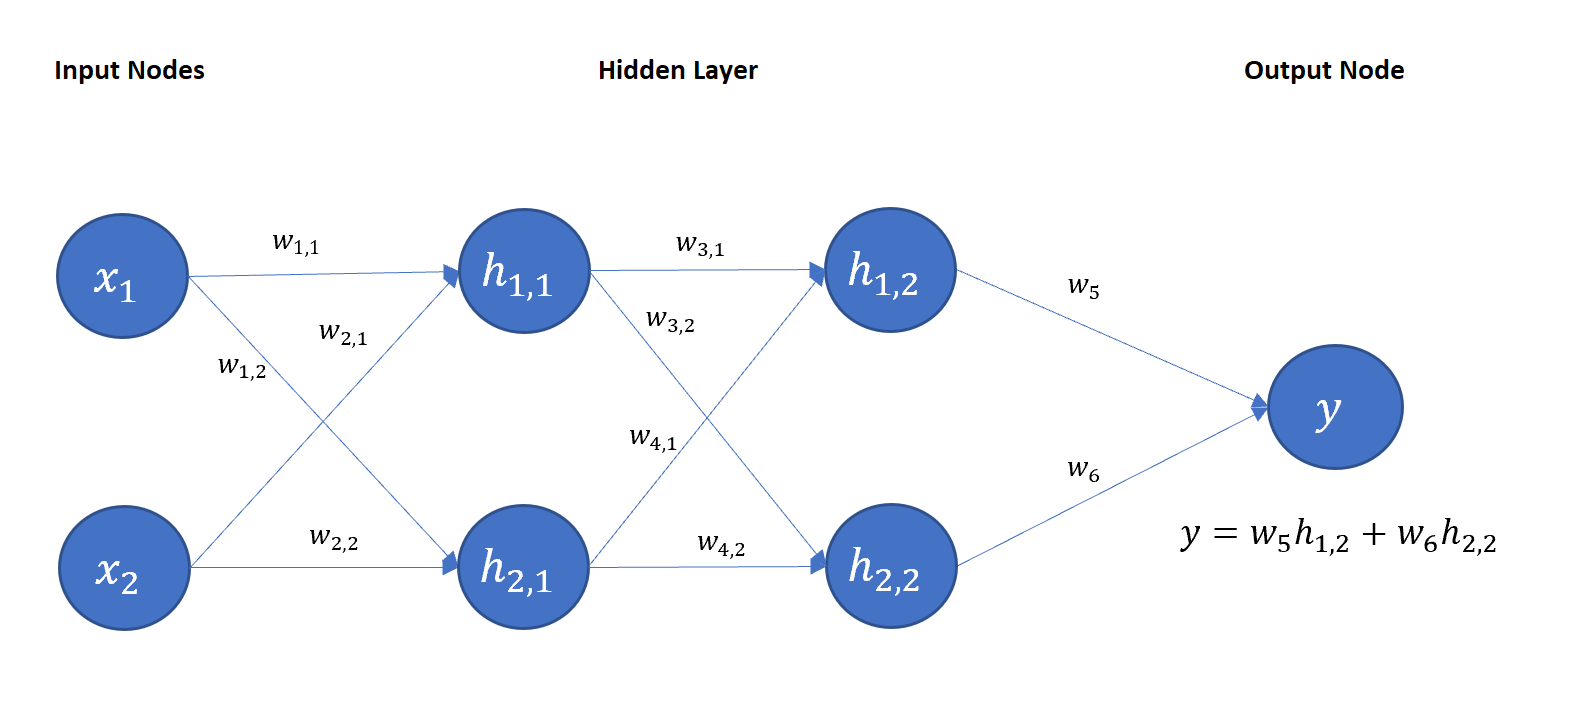

To acquire the weights on the arcs in the neural network, the model is trained using a data set where before the inputs and outputs are known.  Initial weights are used to initialize the model, and then are incrementally adjusted to reduce the size of the error between the computed output value and the known output value.  The shape of these error over the dimensions of weights is known as the loss function, and non-linear optimization techniques (e.g., gradient descent) are used to identify the weightings that minimize the loss function.

To apply these optimization techniques to a neural network, we use <b>backpropagation</b>.  The technique is termed because it starts from the computed prediction error of the training data set and then works backwards through the hidden layers to update the weights in accordance with the optimization technique (e.g., gradient descent).  Every iteration of adjusting the weights across a neural network requires both forward propogation (to compute the node values and prediction error) and backpropogation (to adjust the weights accordingly).

To determine the gradients for each of the weights in the neural network, we would need to identify:
1. The node value feeding into the weight
2. The slope of the activation function for the node that the weight is being fed into
3. The slope of the loss function with respect to the output node

## Modeling Neural Networks with Keras in Python

The module in Python that is frequently utilized for developing neural networks is called <b>keras</b>.  Note that in order to use the Keras module, we must install both Keras and Tensorflow prior to importing any packages.  To specify the model with keras, we start by importing the following:

In [2]:
import numpy as np
from keras.layers import Dense
from keras.models import Sequential

Next, we read in a data file that we would like to analyze using a neural network.  From the dataset, we will identify the number of elements (often, the number of columns) that the dataset has as this indicates the number of input nodes that the model will be starting using for its prediction.

In [23]:
predictors = np.array([[0, 1, 2],                                       # Import dataset of prediction variables
                       [3, 2, 4],                                       # This example uses a toy dataset
                       [7, 8, 12]])
n_cols = predictors.shape[1]                                            # Store the number of columns (i.e. input nodes)
target = np.array([2,                                                 # Provide some target data to train the model
                    6,
                    8])

Once the prediction variables are read in, we then specify the model.  For this stage, we will specify it as a <i>sequential</i> model, which is to say that the nodes of each hidden layer only connect to those that immediately follow it.

We then start to add hidden layers to the model.  In this instance, we will use <i>dense</i> layers as they will have all nodes in the previous layer connect to all the nodes in the subsequent layer.  The arguments of the Dense() function are:
- The number of nodes we want to add to the hidden layer
- The keyword argument for the activation function on these nodes
- (For the 1st layer) The number of input nodes entering the network
- (For the last layer) The number of output nodes

In [30]:
model = Sequential()                                                    # Defines model as a sequential network
model.add(Dense(100, activation = 'relu', input_shape = (n_cols, )))    # Adds hidden layer of 100 nodes w/relu function
model.add(Dense(100, activation = 'relu'))                              # Adds hidden layer of 100 nodes w/relu function
model.add(Dense(1))                                                     # Terminates network into 1 output node

After the model is specified, the next step is to compile the model.  In doing so, we must identify both the optimizer we would like to utilize during backpropogation as well as the loss function.

In [31]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

The next step is to fit the model, which is to say that we will start to apply the backpropogation methods to the network in order to update the weights between nodes.

In [40]:
model.fit(predictors, target)

1/1 [==============================] - 0s 10ms/step - loss: 20.7127


Once a model has been trained to an acceptable level, we will want to save, reload, and utilize the model.  The following code walks through these steps:

In [2]:
from keras.models import load_model                                             # Import package to load saved models

model.save('NN_file.h5')                                                        # Save model as .h5 file
my_model = load_model('NN_file.h5')                                             # Load saved model

input_data = np.array([[6, 4, 8],                                               # Define test predictor data
                       [1, 2, 4], 
                       [3, 5, 2],
                       [1, 3, 2]])
predictions = my_model.predict(input_data)                                      # Use model to predict outputs
predictions

array([[6.2909904],
       [2.731796 ],
       [3.3317041],
       [2.1652167]], dtype=float32)

## Note on using Neural Networks for Classification

Thus far, the neural networks we have constructed have been geared towards <i>predicting</i> an output.  These framework can also be used to <i>classify</i> an output.  When we are classifying data using a neural network, we need to make a few notable changes to the above approach:
- Import the to_categorical package within keras (shown below).
- Set loss function to an appropriate loss function, such as 'categorical_crossentropy'.
- Recommend adding the argument metrics = ['accuracy'] to the compile function, in order to yeild more readily interpretable diagnostics.
- Add activation function to final layer, set to 'softmax'.
- Set the number of output nodes equal to the number of possible classifications for the data.

In [17]:
from keras.utils.np_utils import to_categorical

## Validating Neural Networks

When constructing any type of model, it is critical to validate the model using data that was not used for training the model.  This is to evaluate the effectiveness of the model at predicting an outcome without the model being biased during the training process.  To validate the model, we can include an argument in the model.compile() function which specifies the percentage of the original dataset that should be retained throughout the training process for use in validation.

As the development of the network relies on optimization routines, it is important to consider that (1) we don't know how many iterations it will take to reach an optima and (2) we don't want to continue changing the model is further changes are diminishing its accuracy.  To this end, we can do the following:
- Implement the EarlyStopping() function to enforce a search rule, which states that the optimization process will terminate if the fails to improve the prediction accuracy after a specified number of iterations.
- The epochs argument in the model.fit() function allows us to manually specify the maximum number of iterations the optimization routine should run.

To demonstrate these features, we will restate the previous neural network with these added components.

In [1]:
import numpy as np                                                      # Import numpy
from keras.layers import Dense                                          # Import keras layers
from keras.models import Sequential                                     # Import keras model
from keras.callbacks import EarlyStopping                               # Import early stopping function

predictors = np.array([[0, 1, 2],                                       # Import dataset of prediction variables
                       [3, 2, 4],                                       # This example uses a toy dataset
                       [7, 8, 12]])
target = np.array([2,                                                   # Provide some target data to train the model
                    6,
                    8])
n_cols = predictors.shape[1]                                            # Store the number of columns (i.e. input nodes)

model = Sequential()                                                    # Defines model as a sequential network
model.add(Dense(100, activation = 'relu', input_shape = (n_cols, )))    # Adds hidden layer of 100 nodes w/relu function
model.add(Dense(100, activation = 'relu'))                              # Adds hidden layer of 100 nodes w/relu function
model.add(Dense(1))                                                     # Terminates network into 1 output node

model.compile(optimizer = 'adam', loss = 'mean_squared_error')          # Compile the model using 'adam' optimizer

early_stopping_monitor = EarlyStopping(patience = 2)                    # Stop if model doesn't improve for 2 consecutive iterations

# Fit the model
# Hold 30% of dataset back when training the model for use in validation
# Manually set the maximum number of epochs to 30
# Include the EarlyStopping function
model.fit(predictors, target, validation_split = 0.3, epochs=30, callbacks = [early_stopping_monitor])

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 16.9236 - val_loss: 34.8727
Epoch 2/30
1/1 [==============================] - 0s 79ms/step - loss: 15.2433 - val_loss: 25.8107
Epoch 3/30
1/1 [==============================] - 0s 80ms/step - loss: 13.6759 - val_loss: 18.3186
Epoch 4/30
1/1 [==============================] - 0s 85ms/step - loss: 12.2104 - val_loss: 12.2753
Epoch 5/30
1/1 [==============================] - 0s 101ms/step - loss: 10.8581 - val_loss: 7.4639
Epoch 6/30
1/1 [==============================] - 0s 138ms/step - loss: 9.5817 - val_loss: 3.9708
Epoch 7/30
1/1 [==============================] - 0s 89ms/step - loss: 8.4100 - val_loss: 1.5765
Epoch 8/30
1/1 [==============================] - 0s 97ms/step - loss: 7.3486 - val_loss: 0.2715
Epoch 9/30
1/1 [==============================] - 0s 83ms/step - loss: 6.4045 - val_loss: 0.0338
Epoch 10/30
1/1 [==============================] - 0s 89ms/step - loss: 5.5559 - val_loss: 0.7222
Epoch 11/30
1/1 [===

## How Many Nodes & Layers is Best?

Model capacity is the ability for the model to capture predictive patterns in the data.  We can increase the model's capacity by adding nodes within hidden layers or adding additional hidden layers to the network.  However, we want to avoid unintentionally adding these components unnecessarily as we may experience issues such as overfitting or underfitting the model.

In practice, it is a good technique to begin with a smaller network, and gradually expand the model's capacity incrementally so long as the validation score improves or the resulting error decreases.  Once these metrics start to move in the opposite direction, peel back a portion of the model's capacity.

## Example Problem

To demonstrate using a neural network, we will examine data from elementary schools in Ohio from the school year 2013-2014.  In this dataset, we have information on teacher attendence, salary, and education level for 1,502 public schools in Ohio, as well as the school's K3 literacy rate.  These literacy rates have been categorized on a grade scale from A - F.  In this example, we will use a neural network to build a model which attempts to predict the school's K3 literacy grade based upon the associated teacher information.

The following cell of code provides a sample of the dataset we will be working with.

In [75]:
import pandas as pd
data = pd.read_excel('C:/Users/hornb/Desktop/2013_Ohio_School_Data.xlsx')
data.head()

,Building IRN,Building Name,Teacher_Attendance_Rate,Teacher_Years_Experience,Teacher_Salary,Teacher_Percent_Bach,Teacher_Percent_Mast,Core_Courses_Taught_by_Cert_Teacher,K3 Literacy Percent,Letter Grade of K3 Literacy
0,556,A+ Arts Academy,97.7,3,36023,100.0,26.4,95.2,33.3,D
1,8064,Academy of Arts and Sciences,97.1,6,30762,100.0,6.3,100.0,44.4,D
2,59,Ada Elementary School,91.2,11,53034,100.0,76.9,100.0,21.1,F
3,33936,North Adams Elementary School,95.0,13,49717,100.0,81.1,85.0,60.4,C
4,29520,Peebles Elementary School,92.1,12,48470,100.0,61.2,100.0,57.9,C


In this example, we will be using the network to categorize data into specific bins.  The to_categorical() function within the keras package can aid in coverting a column of indicator digits to usable columns of binary variables.  Before we can utilize this function, however, we need to convert the column of strings grades (i.e., A - F) to a column of indicator values (i.e., 1 - 5).  To do this, we will build a separate reference table and join the two DataFrames together.

Once the table has been formatted with an appropriate column of categorical data, we will construct a neural network in a similar fashion as was previously discussed.  After tuning the model, we find that beyond 4 hidden layers of 250 nodes the accuracy of the models begins to diminish.  Early stopping and manual epoch settings have been placed on the model to promote a sufficiently long search but also to prevent from leaving an optima when tuning the weights.

In [76]:
import numpy as np                                                      # Import numpy
from keras.utils.np_utils import to_categorical                         # Import keras categorical converter function
from keras.layers import Dense                                          # Import keras layers
from keras.models import Sequential                                     # Import keras model
from keras.callbacks import EarlyStopping                               # Import keras early stopping function

# Construct a reference table, relating letter grades to numerical categories
grade_ref_table = pd.DataFrame(data = {'Letter Grade of K3 Literacy': ['A', 'B', 'C', 'D', 'F'], 'Grade': [1, 2, 3, 4, 5]})
# Merge the reference table and the main dataset
data = pd.merge(data, grade_ref_table, on = 'Letter Grade of K3 Literacy', how = 'inner')

# Drop the non-predictor columns
predictors = data.drop(['Building IRN', 'Building Name', 'K3 Literacy Percent', 'Letter Grade of K3 Literacy', 'Grade'], axis = 1)
predictors = predictors.values                                          # Convert the DataFrame to numpy array
n_cols = predictors.shape[1]                                            # Store the number of predictor variables
target = to_categorical(data['Grade'])                                  # Convert categorical info to array of binary values; store as target

model = Sequential()                                                    # Initialize the model; define it as sequential

model.add(Dense(250, activation = 'relu', input_shape = (n_cols, )))    # Add first hidden layer
model.add(Dense(250, activation = 'relu'))                              # Add second hidden layer
model.add(Dense(250, activation = 'relu'))                              # Add third hidden layer
model.add(Dense(250, activation = 'relu'))                              # Add fourth hidden layer
model.add(Dense(6, activation = 'softmax'))                             # Add output nodes

early_stopping_monitor = EarlyStopping(patience = 2)                    # Define early stopping parameters

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])    # Compile model

model.fit(predictors, target, validation_split = 0.3, epochs=30, callbacks = [early_stopping_monitor])  # Fit model

Epoch 1/30
33/33 [==============================] - 2s 25ms/step - loss: 769.8505 - accuracy: 0.3442 - val_loss: 2604.2344 - val_accuracy: 0.0000e+00
Epoch 2/30
33/33 [==============================] - 0s 13ms/step - loss: 204.7627 - accuracy: 0.3447 - val_loss: 2221.6201 - val_accuracy: 0.2949
Epoch 3/30
33/33 [==============================] - 0s 9ms/step - loss: 126.5512 - accuracy: 0.3312 - val_loss: 1650.6930 - val_accuracy: 0.2949
Epoch 4/30
33/33 [==============================] - 0s 11ms/step - loss: 48.4591 - accuracy: 0.3430 - val_loss: 1480.1505 - val_accuracy: 0.0000e+00
Epoch 5/30
33/33 [==============================] - 0s 8ms/step - loss: 57.9808 - accuracy: 0.3349 - val_loss: 1247.9950 - val_accuracy: 0.0000e+00
Epoch 6/30
33/33 [==============================] - 0s 8ms/step - loss: 103.4619 - accuracy: 0.3822 - val_loss: 827.8613 - val_accuracy: 0.0000e+00
Epoch 7/30
33/33 [==============================] - 0s 7ms/step - loss: 113.8721 - accuracy: 0.3524 - val_loss: 69

Using only teacher information and the neural network, we are able to predict a school's K3 Literacy Grade with approximately 35% accuracy.  This suggests that there are more factors at play in the literacy rating aside from these variable's regarding teacher attendence, salary, and education.  Nonetheless, it serves to demonstrate how we can analyze a dataset using a neural network.